# Exponential distribution

The probability density function for expon is: $f(x) = e^{-x}$, for $x > = 0$

The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, expon.pdf(x, loc, scale) is identically equivalent to expon.pdf(y) / scale with y = (x - loc) / scale. Note that shifting the location of a distribution does not make it a “noncentral” distribution; noncentral generalizations of some distributions are available in separate classes.

A common parameterization for expon is in terms of the rate parameter lambda, such that $$f(x;\lambda) = \lambda * e^{-\lambda  x}$$. This parameterization corresponds to using scale = 1 / lambda.

The exponential distribution is a special case of the gamma distributions, with gamma shape parameter a = 1.

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import expon

True


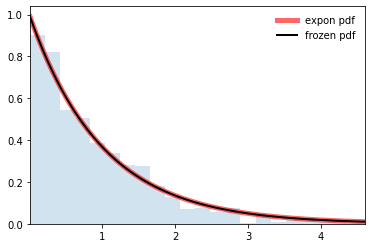

In [31]:
fig, ax = plt.subplots(1, 1)

# Display the probability density function (pdf):
x = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')

# Alternatively, the distribution object can be called (as a function) to fix the shape, 
# location and scale parameters. 
# This returns a “frozen” RV object holding the given parameters fixed.
# Freeze the distribution and display the frozen pdf:
rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:
vals = expon.ppf([0.001, 0.5, 0.999])
print(np.allclose([0.001, 0.5, 0.999], expon.cdf(vals)))

# Generate random numbers:
r = expon.rvs(size=1000)

# And compare the histogram:
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

In [2]:
# DIY implementation of exponential pdf function
def expon_pdf(x, lamb):
    y = lamb * np.exp(-lamb * x)
    return x, y, np.mean(y), np.std(y)


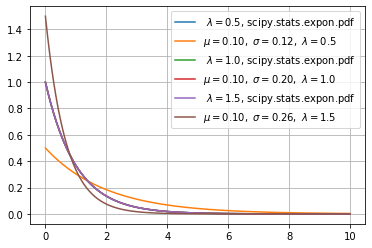

In [30]:
for lamb in [0.5, 1, 1.5]:

    x = np.arange(0, 10, 0.01, dtype=float)
    x, y, u, s = exponential(x, lamb=lamb)
    #plt.plot(x,expon.pdf(x),label=r'$\mu=%.2f,\ \sigma=%.2f,'r'\ \lambda=%2.1f$' % (u, s, lamb))
    plt.plot(x,expon.pdf(x),label=r'$'r'\ \lambda=%2.1f$, scipy.stats.expon.pdf' % (lamb))
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'r'\ \lambda=%2.1f$' % (u, s, lamb))
plt.legend()
plt.savefig('graph/exponential.png')
plt.grid()
plt.show()